## 의료보험데이터를 이용한 의료 보험 비용 예측

### 데이터 읽어들인 후 종속변수와 독립변수 체크

In [1]:
# 라이브러리
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# 나이, 성별, 체질량지수, 자녀수, 흡연여부, 거주지역 = 독립변수
# 의료보험료 = 종속변수

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
# 결측치 수 재확인
df.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 선형 회귀 이전 charges ~ age + sex + bmi + children + smoker + region 입력

In [29]:
fit=ols('charges ~ age + sex + bmi + children + smoker + region', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        17:08:17   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

- R-squared : 0.751 선형 회귀모형의 설명력이 75.1%이다.
- Adj. R-squared : 0.749 변수의 수를 보정한 설명력으로 과적합 위험을 줄여주며 우수한 수준이다.
- sex는 p값이 0.5보다 높아 보험료에 유의미한 영향 x  / 흡연자가 비흡연자에 비해 2.4만달러 높음
- smoker p값이 0.001보다 작아 보혐료에 강한 양의 영향 끼침
- region 지역도 기준 대비 유의미한 영향 x
- age 나이가 많을 수록 보험료 증가           /  1살 증가 시 약 257달러 증가
- bmi 체질량지수 증가 시 보험료 증가        / 수치가 1 오를 시 약 339달러 증가 
- childern 자녀가 많을 수록 보험료 증가     / 자녀 1명당 약 476달러 증가

회귀식 : Charges = -11,940 + ( 23,850 )*smoker + ( 256.8564 )*age + ( 339.1935 )*bmi + ( 475.5005 )*children

### 선형 회귀 

In [9]:
X = df.drop('charges', axis=1)
y = df['charges']

# One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# 학습용/테스트용 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

In [10]:
comparison = pd.DataFrame({'actual' : y_test, 'pred':pred})
comparison

,actual,pred
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457
...,...,...
109,47055.53210,39061.500932
575,12222.89830,11761.499198
535,6067.12675,7687.563632
543,63770.42801,40920.291512


<Axes: xlabel='actual', ylabel='pred'>

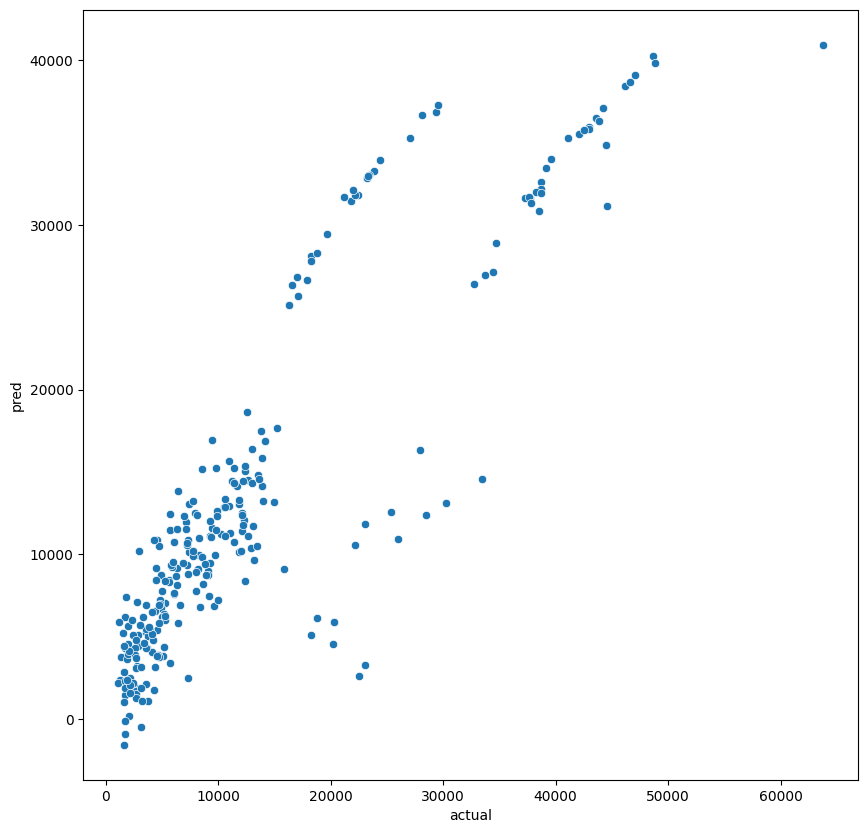

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'actual', y='pred', data = comparison)

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred) ** 0.5    # RMSE 실행

5796.2846592762735

In [21]:
import numpy as np

np.sqrt(mean_squared_error(y_test, pred))  # 수동으로 계산

np.float64(5796.2846592762735)

In [22]:
model.score(X_train, y_train)

0.7417255854683333

In [24]:
print(X_train.dtypes)

age                   int64
bmi                 float64
children              int64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [25]:
X_train = X_train.astype(int)
X_train_const = sm.add_constant(X_train)  # 스탯스모델은 절편을 자동으로 포함하지 않아 수동으로 절편 항을 추가.

# without add_constant -> 절편이 0이 되어 회귀선이 (0,0)을 지나야함

# y_train도 혹시 모를 오류 방지를 위해 float으로
y_train = y_train.astype(float)

# OLS 모델 적합
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.7
Date:                Wed, 07 May 2025   Prob (F-statistic):          1.59e-305
Time:                        10:38:19   Log-Likelihood:                -10846.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.173e+04   1100.507  

- 결정 계수 : 0.742 (R** 모델 성능도 준수) 
- 보정된 설명력 : 모델 과적합되지 않음
- F-statistic 전체 모델이 통계적으로 유의미함
- Durbin-Watson 오차 간 독릭성 양호(2에 가까우면 좋음)
- 유의미 ( age , bmi , children , smoker_yes )
- charges = -11730.00  + 257.10 × age  + 335.63 × bmi + 427.58 × children - 17.29 × sex_male + 23660.00 × smoker_yes
            -364.17 × region_northwest - 667.60 × region_southeast  - 819.60  region_southwest